In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.dates as mdates
from datetime import datetime, timedelta

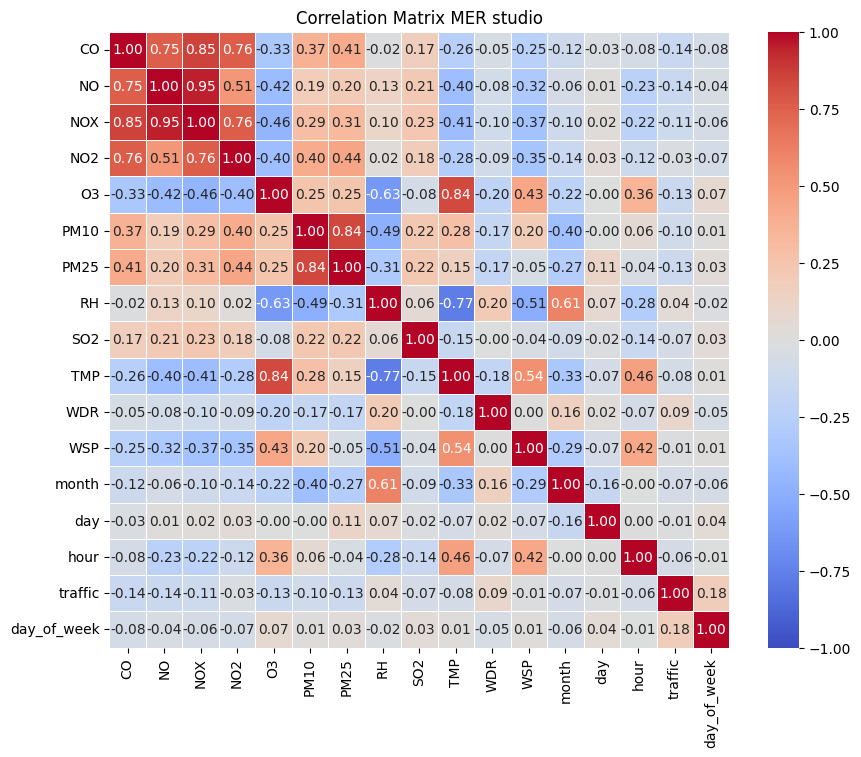

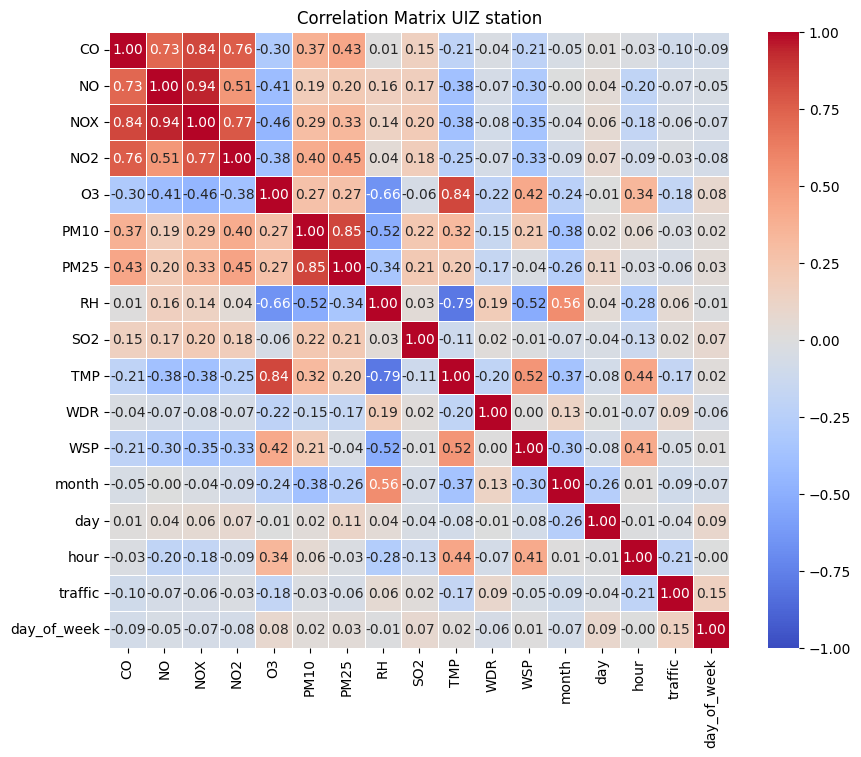

In [18]:
#dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER studio")
plt.show()

#X = df.drop(columns=['date', 'year', 'month', 'day', 'minute', 'traffic'])
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix UIZ station")
plt.show()


In [2]:
def correlation_plots(df, df2, station1, station2):
	for var in ["O3", "PM10", "PM25", "NO2", "SO2", "CO", "NO", "NOX", "traffic"]:
		target_variable = var
		# Calcular correlaciones con la variable objetivo
		corr1 = df.corr()[target_variable].drop(target_variable).sort_values(ascending=False)
		corr2 = df2.corr()[target_variable].drop(target_variable).sort_values(ascending=False)
		# Plot
		fig, axes = plt.subplots(1, 2, figsize=(18, 4))

		# First subplot
		sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
		axes[0].set_ylim(-1, 1)
		axes[0].set_ylabel("Correlation coeficient")
		axes[0].set_xlabel("Variables")
		axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
		axes[0].grid(axis="y", linestyle="--", alpha=0.7)
		axes[0].set_title(f"Correlation of variables with'{target_variable}' in {station1} station", fontsize=16, fontweight="bold")
		#"""
		# Second subplot
		sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
		axes[1].set_ylim(-1, 1)
		axes[1].axhline(0, color='black', linewidth=1)
		axes[1].set_ylabel("Correlation coeficient")
		axes[1].set_xlabel("Variables")
		axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
		axes[1].grid(axis="y", linestyle="--", alpha=0.7)
		axes[1].set_title(f"Correlation of variables with'{target_variable}' in {station2} station", fontsize=16, fontweight="bold")
		# Show plot
		plt.tight_layout()
		plt.show()
		#"""

In [20]:
#dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos"
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])

#correlation_plots(df, df2, "MER", "UIZ")

In [112]:
#df  = pd.read_csv('C:/Users/valer/Documents/CIC/doctorado/Proyecto_Innovacion/main/air-poll-predict-dev/API/InfoPostgres/Datos/air_traffic_MER_norm.csv')
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df["datetime"] = df["date"].astype(str) + " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)+"0:00"

In [81]:
def graficar_predicciones(new_hours, predicciones, variable):
  """

  Args:
    new_hours:
    target:
    predicciones:
  """
  fechas = new_hours
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S') for fecha in fechas]

  # Crear el gráfico
  plt.figure(figsize=(10, 6))

  # Graficar el target y las predicciones en el eje Y
  plt.plot(fechas_datetime, predicciones, label='Predicciones', marker='o')

  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  # Configurar etiquetas y título
  plt.xlabel('Datetime')
  plt.ylabel(r'O$_3$ Value')
  title1 = 'Comparison over time of the predicted values ​​vs their actual value (' + variable +')'
  plt.title(title1)

  # Mostrar la leyenda
  plt.legend()
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

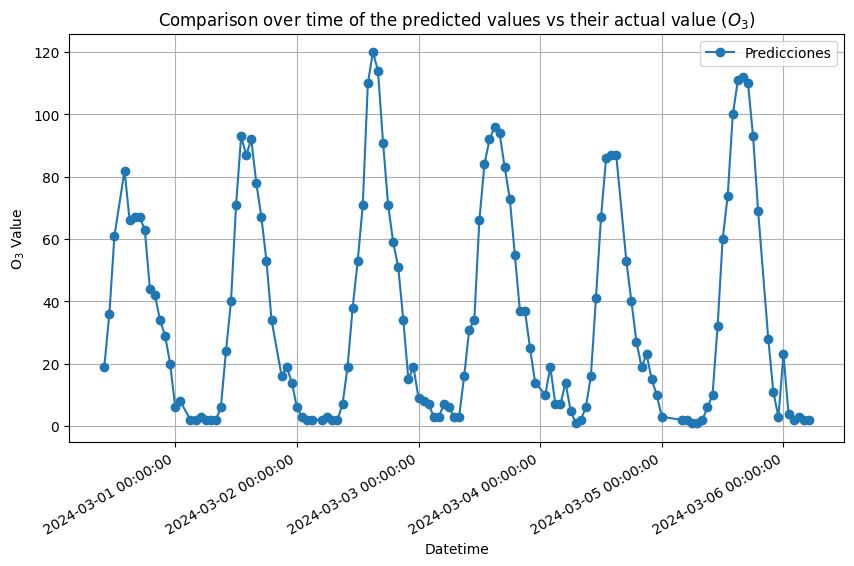

In [82]:
graficar_predicciones(df["datetime"][50:180], df.O3[50:180], r'$O_3$')

In [3]:
def plot_values(df_bymonth, df_byhour, varXmonth, varXhour):
	fig, axes = plt.subplots(2, 3, figsize=(16, 5))
	axes[0, 0].scatter(df_bymonth[varXmonth],df_bymonth.O3)
	axes[0, 0].set_ylabel(r'O$_3$')
	axes[0, 0].set_xlabel("Month of the year")
	axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 1].scatter(df_bymonth[varXmonth],df_bymonth.TMP)
	axes[0, 1].set_ylabel("Temperature")
	axes[0, 1].set_xlabel("Month of the year")
	axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.O3, label=r'O$_3$', color='r')  
	axes[0, 2].plot(df_bymonth[varXmonth],df_bymonth.TMP, label="Temperature", color='b')
	axes[0, 2].legend()  # Add legend
	axes[0, 2].set_ylabel("Values normalized")
	axes[0, 2].set_xlabel("Month of the year")

	axes[1, 0].scatter(df_byhour[varXhour],df_byhour.O3)
	axes[1, 0].set_ylabel(r'O$_3$')
	axes[1, 0].set_xlabel("Hour of the day")
	axes[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 1].scatter(df_byhour[varXhour],df_byhour.TMP)
	axes[1, 1].set_ylabel("Temperature")
	axes[1, 1].set_xlabel("Hour of the day")
	axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

	axes[1, 2].plot(df_byhour[varXhour],df_byhour.O3, label=r'O$_3$', color='r') 
	axes[1, 2].plot(df_byhour[varXhour],df_byhour.TMP, label="Temperature", color='b') 
	axes[1, 2].legend()  # Add legend
	axes[1, 2].set_ylabel("Values normalized")
	axes[1, 2].set_xlabel("Hour of the day")
	axes[1, 2].grid(axis="y", linestyle="--", alpha=0.7)

	# Titles for each subplot (optional)
	axes[0, 0].set_title('Ozone vs month of the year 2024')
	axes[0, 1].set_title('Temperature vs month of the year 2024')
	axes[0, 2].set_title('Tmp&Ozone vs month of the year')
	axes[1, 0].set_title('Ozone vs hour of the day')
	axes[1, 1].set_title('Temperature vs hour of the day')

	plt.tight_layout()
	plt.show()

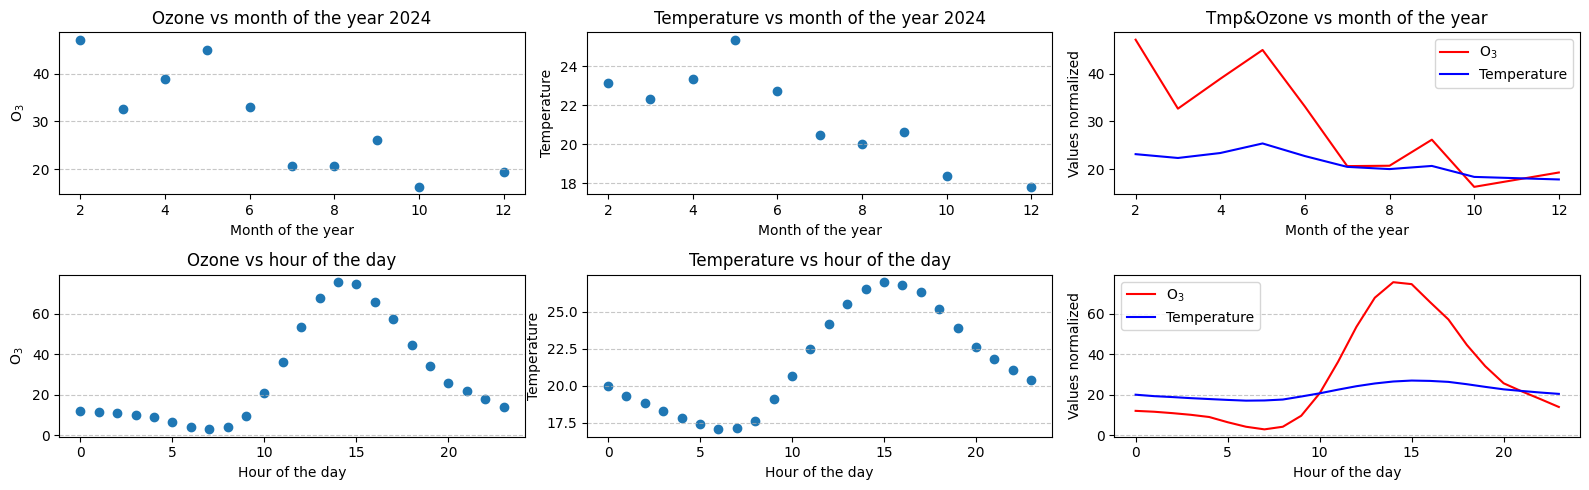

In [84]:
df_bymonth_original = df.groupby('month').agg({
        'O3': 'mean',  
        'TMP': 'mean',  
    }).reset_index()
df_byhour_original = df.groupby('hour').agg({
        'O3': 'mean',  
        'TMP': 'mean', 
    }).reset_index()
plot_values(df_bymonth_original,df_byhour_original, "month", "hour")

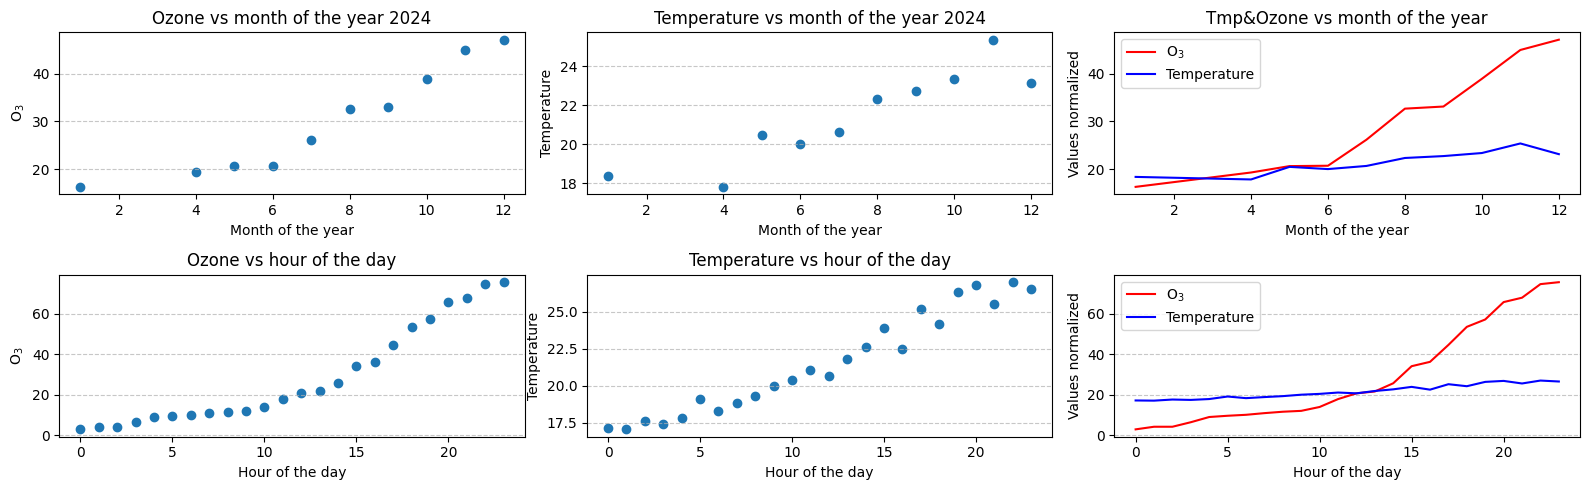

In [85]:
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df_bymonth = df_bymonth_original.sort_values(by='O3', ascending=True)
df_bymonth["month_idx"] = df_bymonth["month"].map(month_idx)

hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df_byhour = df_byhour_original.sort_values(by='O3', ascending=True)
df_byhour["hour_idx"] = df_byhour["hour"].map(hour_idx)

plot_values(df_bymonth,df_byhour, "month_idx", "hour_idx")

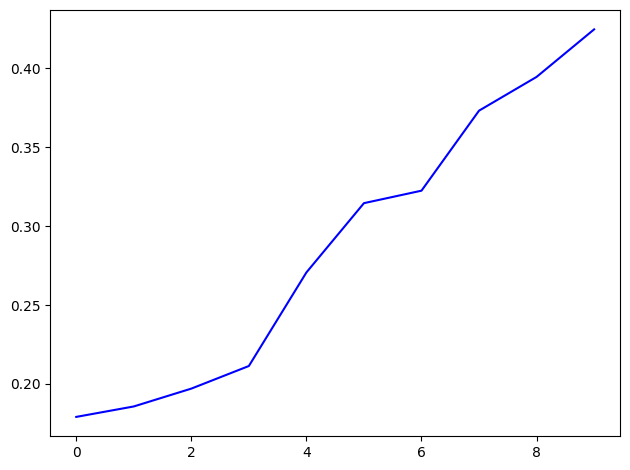

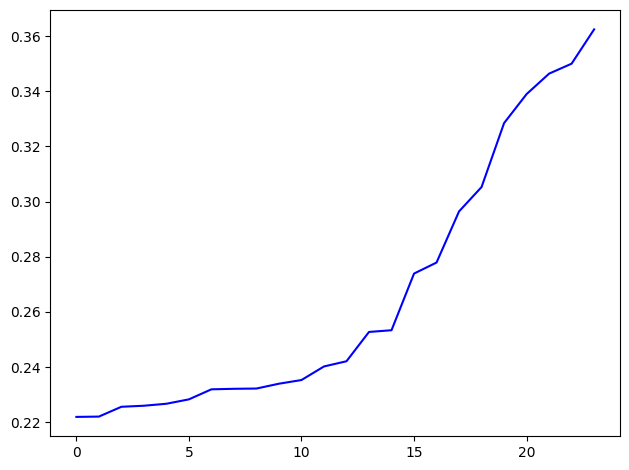

In [30]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df["datetime"] = df["date"].astype(str) + " " + df["hour"].astype(str) + ":" +df["minute"].astype(str)+"0:00"
target = "PM25"
df_bymonth_original = df.groupby('month').agg({
        target: 'mean',   
    }).reset_index()

df_byhour_original = df.groupby('hour').agg({
        target: 'mean',  
    }).reset_index()

df_bymonth = df_bymonth_original.sort_values(by=target, ascending=True)
df_byhour = df_byhour_original.sort_values(by=target, ascending=True)

#month_idx= {1:11, 2:5, 3:9, 4:4, 5:10, 6:3, 7:2, 8:1, 9:8, 10:6, 11:7, 12:12} #CO
#hour_idx = {15:0, 14:1, 16:2, 13:3, 17:4, 4:5, 18:6, 12:7, 3:8, 2:9, 5:10, 1:11, 19:12, 0:13, 22:14, 21:15, 20:16, 23:17, 11:18, 6:19, 10:20, 7:21, 9:22, 8:23} # CO
#hour_idx = {15:0, 14:1, 16:2, 17:3, 13:4, 18:5, 19:6, 12:7, 21:8, 22:9, 20:10, 23:11, 0:12, 4:13, 1:14, 2:15, 3:16, 11:17, 5:18, 10:19, 6:20, 9:21, 7:22, 8:23} #NO
#month_idx= {6:0, 10:1, 11:2, 8:3, 9:4, 4:5, 7:6, 2:7, 1:8, 5:9, 3:10, 12:11} #NO

hour_idx = {}
for idx,hr in enumerate(df_byhour.hour):
    hour_idx[hr] = idx
    
month_idx = {}
for idx,month in enumerate(df_bymonth.month):
    month_idx[month] = idx

df_byhour["hour_idx"] = df_byhour["hour"].map(hour_idx)
df_bymonth["month_idx"] = df_bymonth["month"].map(month_idx)
varXmonth = "month_idx"
varXhour = "hour_idx"
plt.plot(df_bymonth[varXmonth],df_bymonth[target], label=str(target), color='b')
plt.tight_layout()
plt.show()
plt.plot(df_byhour[varXhour],df_byhour[target], label=str(target), color='b') 
plt.tight_layout()
plt.show()


C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

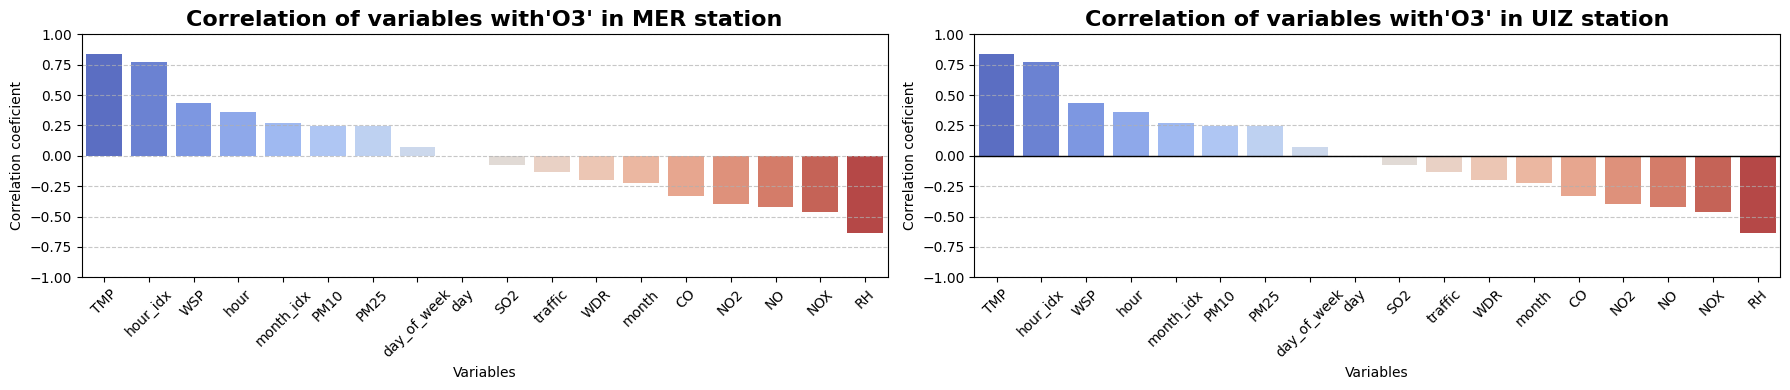

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

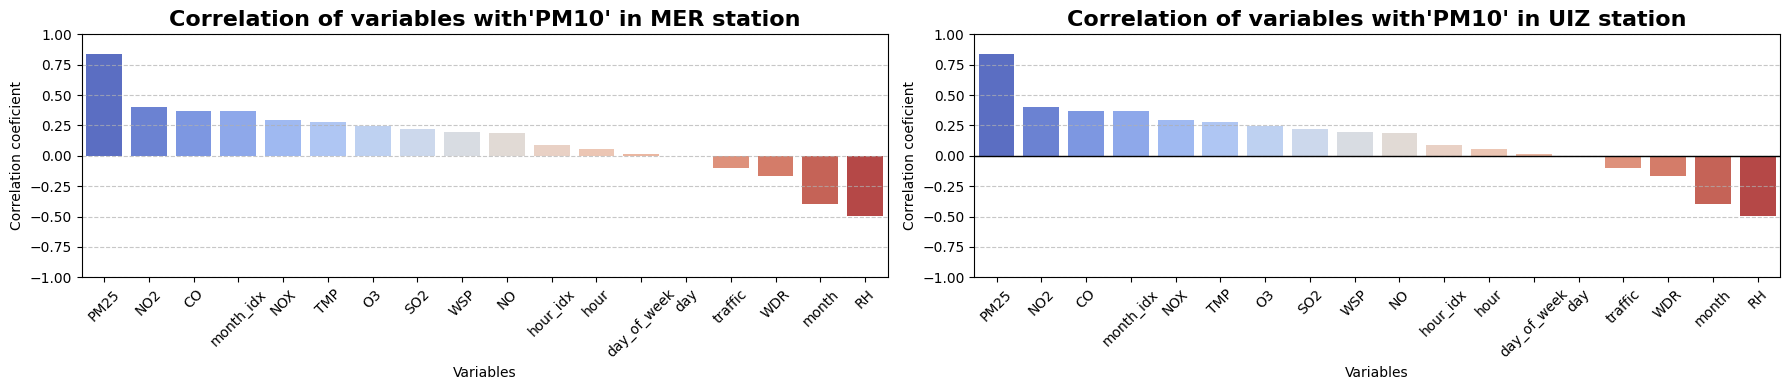

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

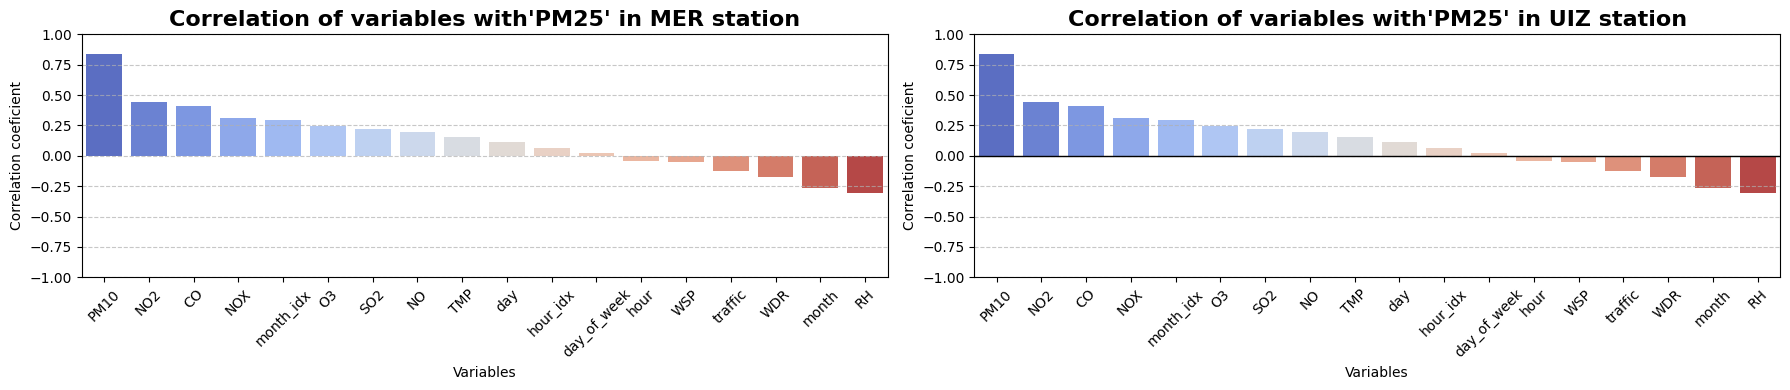

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

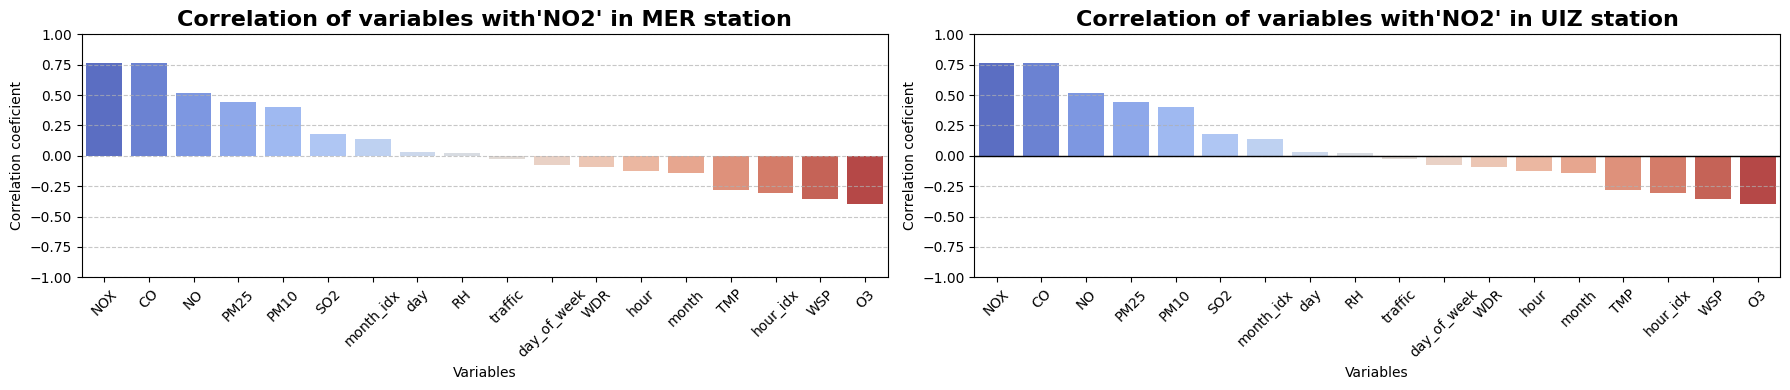

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

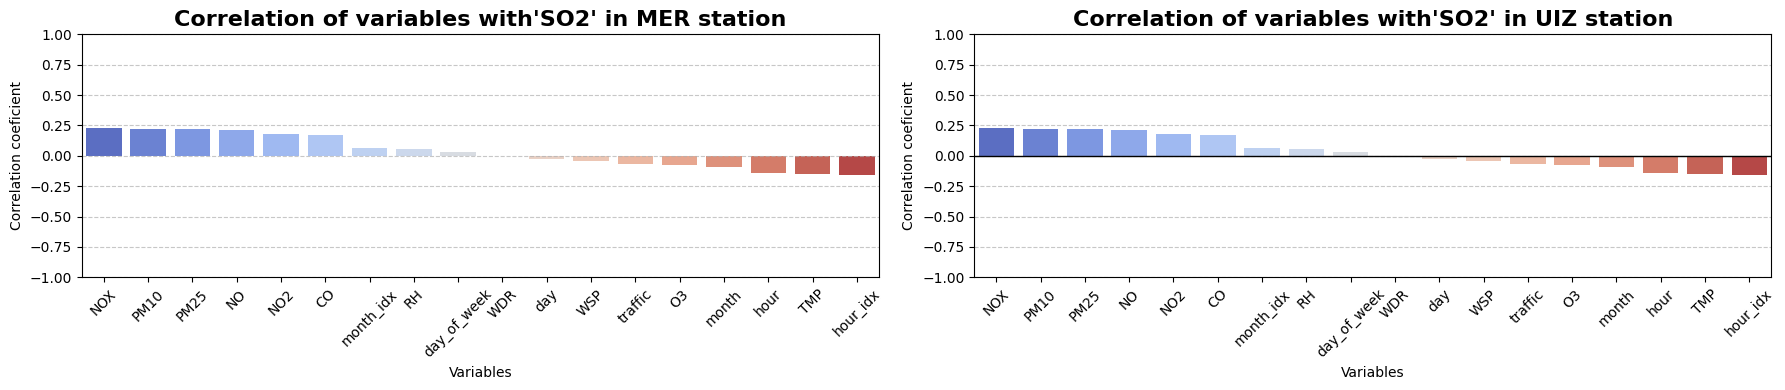

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

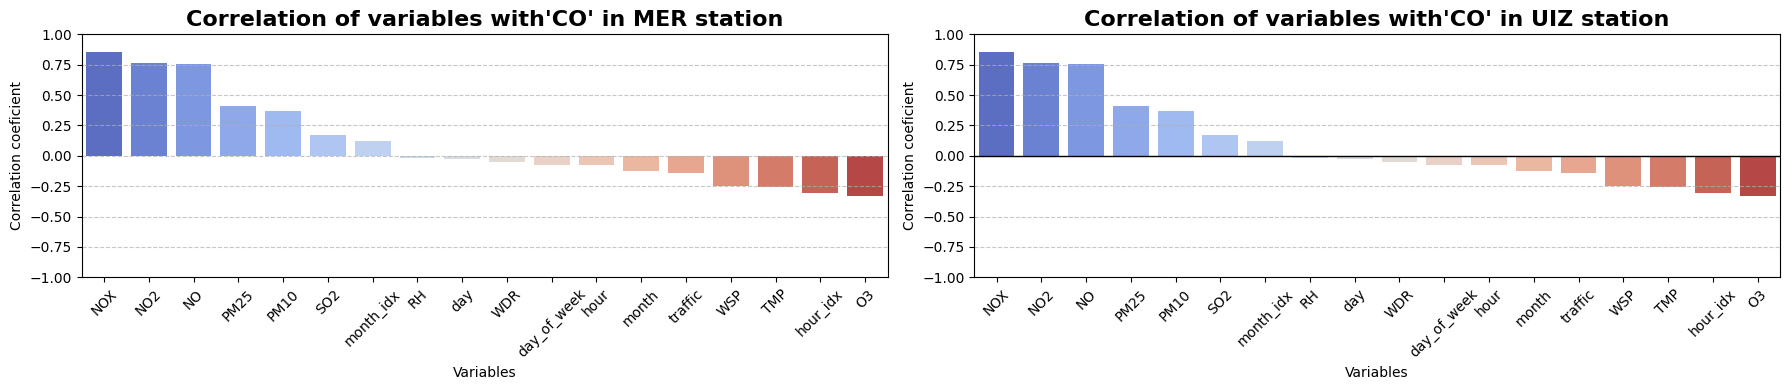

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

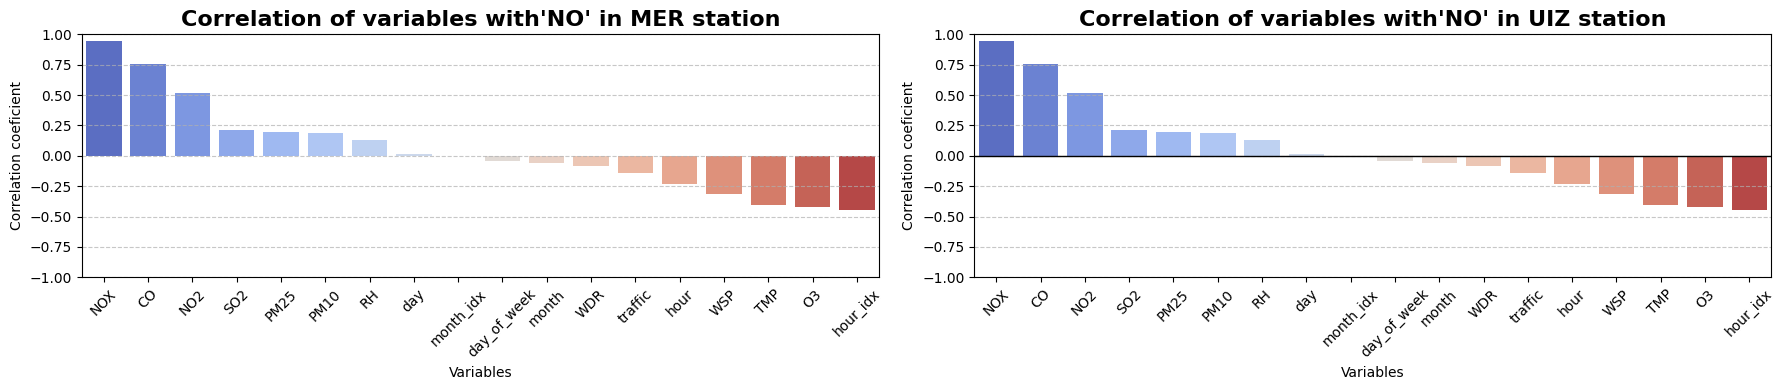

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

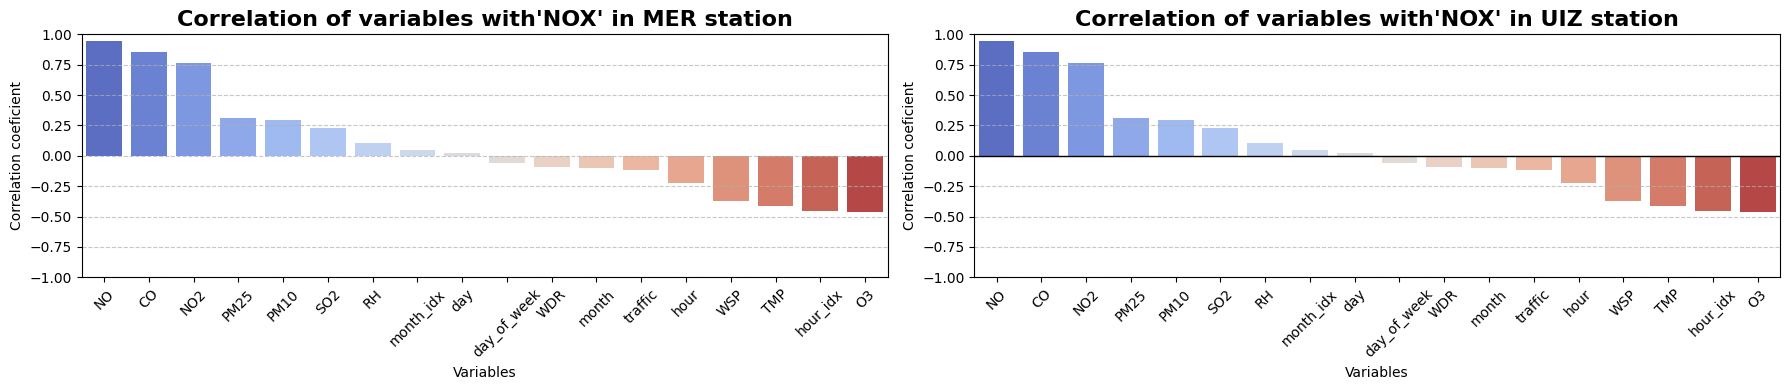

C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr1.index, y=corr1.values, palette="coolwarm", ax=axes[0])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.index, y=corr2.values, palette="coolwarm", ax=axes[1])
C:\Users\Valeria\AppData\Local\Temp\ipykernel_6292\405287197.py:25: UserWarning: s

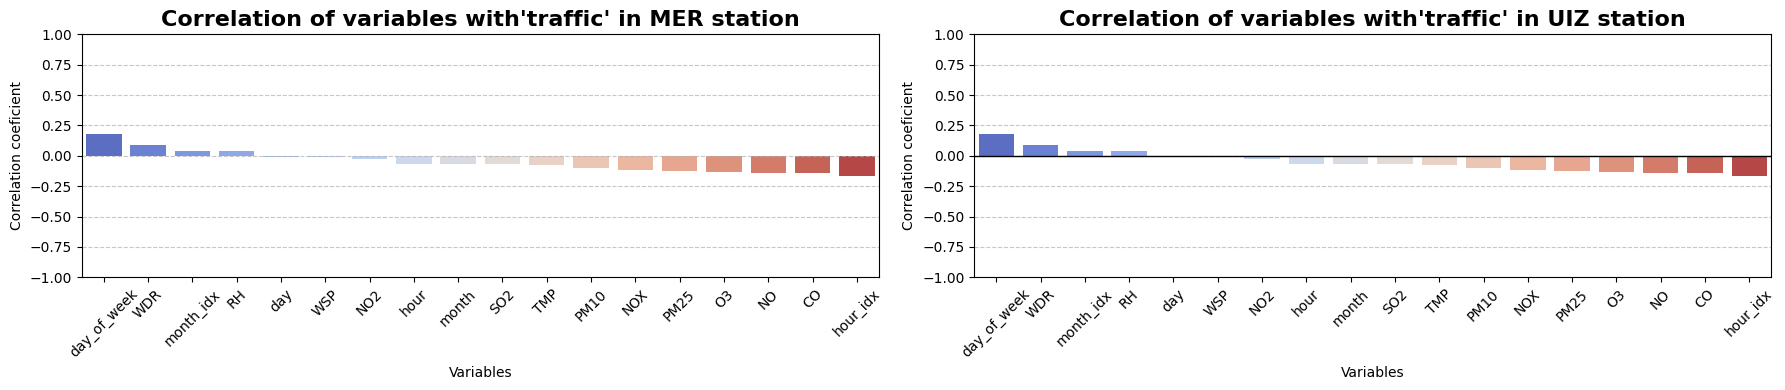

In [28]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df = df.drop(columns=['date', 'year','minute'])
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df["month_idx"] = df["month"].map(month_idx)
hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df["hour_idx"] = df["hour"].map(hour_idx)

file_path = os.path.join(dir,"air_traffic_UIZ_norm.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date'])
df2['day_of_week'] = df2['date'].dt.weekday
df2 = df2.drop(columns=['date', 'year','minute'])
month_idx= {12:4, 11:2, 10:1, 9:7, 8:6, 7:5, 6:9, 5:11, 4:10, 3:8, 2:12, 1:3}
df2["month_idx"] = df2["month"].map(month_idx)
hour_idx= {7:0, 6:1, 8:2, 5:3, 4:4, 9:5, 3:6, 2:7, 1:8, 0:9, 23:10, 22:11, 10:12, 21:13, 20:14, 19:15, 11:16, 18:17, 12:18, 17:19, 16:20, 13:21, 15:22, 14:23 }
df2["hour_idx"] = df2["hour"].map(hour_idx)

correlation_plots(df, df, "MER", "UIZ")

Text(0.5, 1.0, 'Correlation Matrix UIZ station')

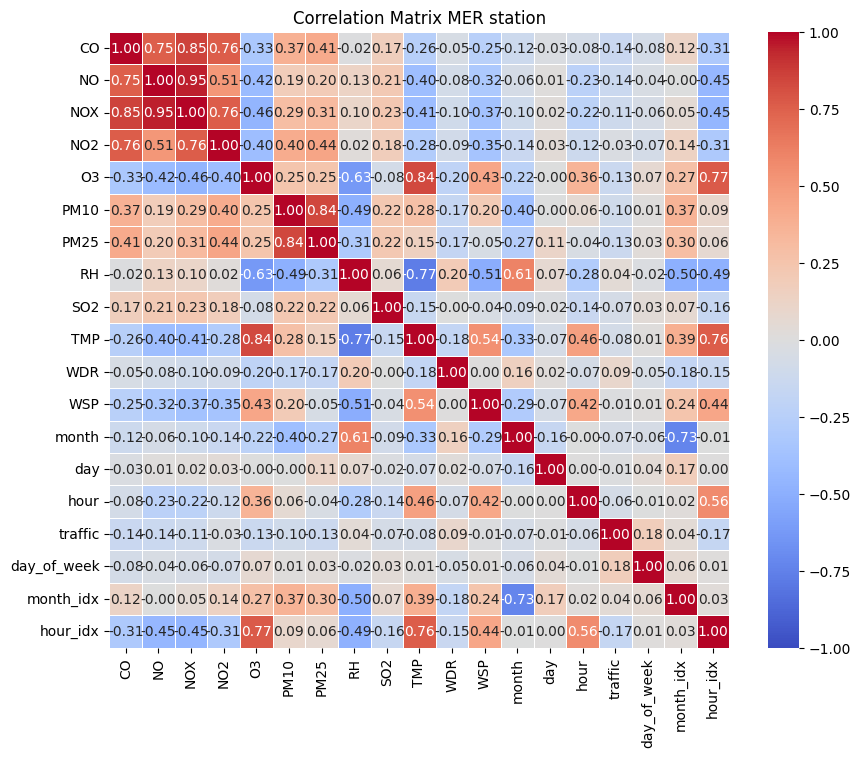

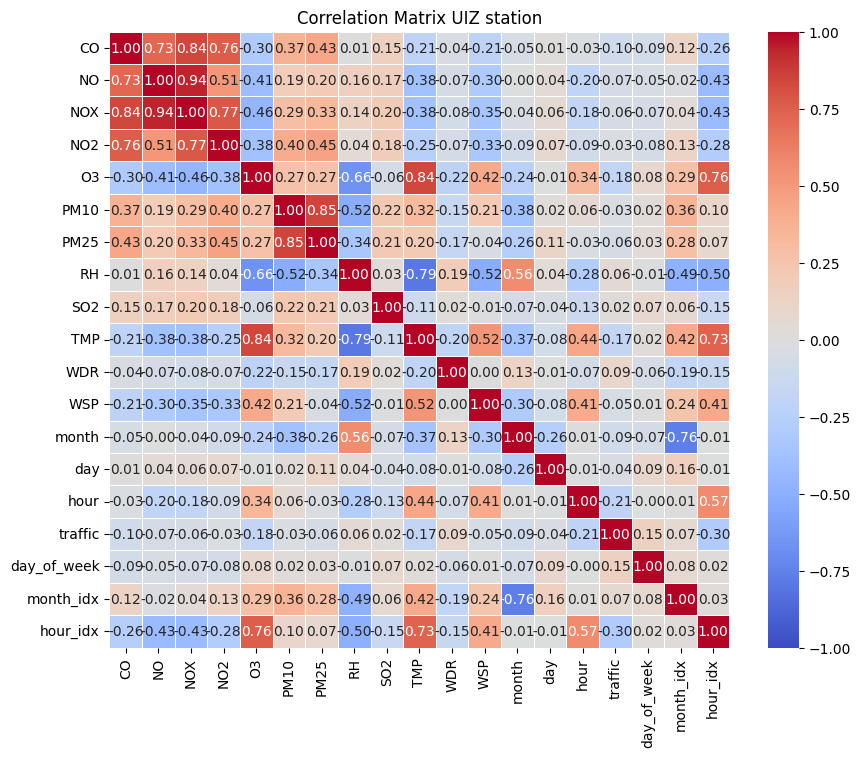

In [29]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix MER station")

corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix UIZ station")

Plot of the temperature vs ozone

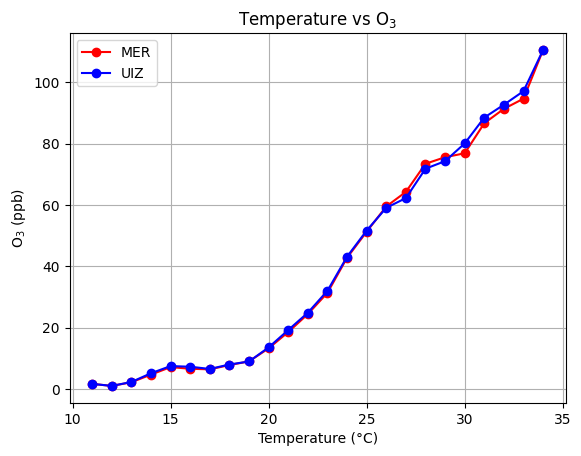

In [30]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)

file_path = os.path.join(dir,"air_traffic_UIZ_prom.csv")
df2  = pd.read_csv(file_path)
df2 = df2.dropna().reset_index(drop=True)
df_tmp = df.groupby('TMP').agg({'O3': 'mean'}).reset_index()
df_tmp2 = df2.groupby('TMP').agg({'O3': 'mean'}).reset_index()
plt.plot(df_tmp.TMP,df_tmp.O3, marker='o', label='MER', color='r')
plt.plot(df_tmp2.TMP,df_tmp2.O3, marker='o', label='UIZ', color='b')
plt.xlabel('Temperature (°C)')
plt.ylabel(r'O$_3$ (ppb)')
title1 = r'Temperature vs O$_3$'
plt.title(title1)
plt.legend()
plt.grid(True)
plt.show()

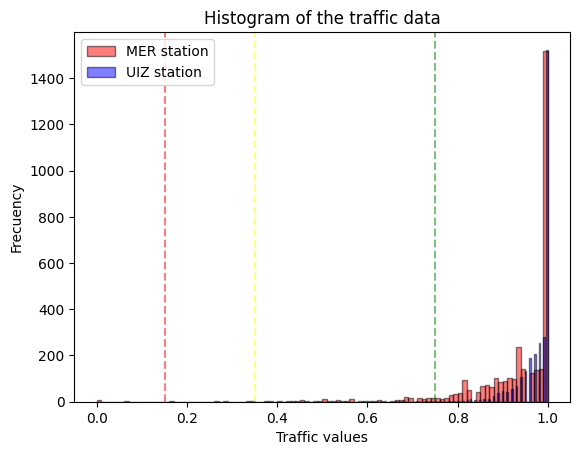

In [31]:
plt.hist(df.traffic, bins=100, color='red', edgecolor='black', alpha=0.5)
plt.hist(df2.traffic, bins=100, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram of the traffic data')
plt.xlabel('Traffic values')
plt.ylabel('Frecuency')
plt.legend(["MER station", "UIZ station"], loc="upper left")
plt.axvline(x = 0.15, color = 'red', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.35, color = 'yellow', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.75, color = 'green', linestyle = '--', alpha = 0.5)
plt.show()

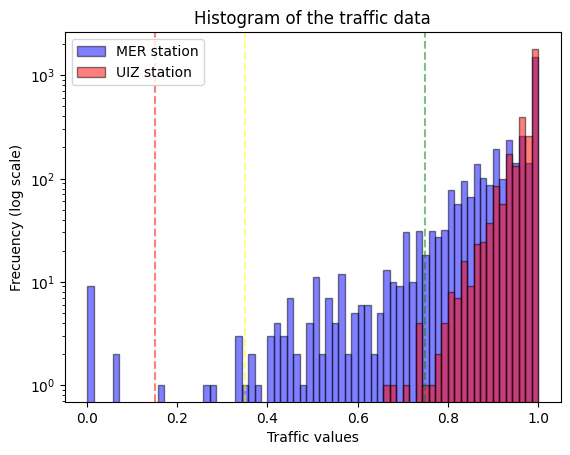

In [32]:
bin_width = (1 - 0) / 70  # Define width based on desired bins
bins = np.arange(0, 1 + bin_width, bin_width)  # Ensure consistent width
plt.hist(df[df.traffic<=1.0].traffic, bins=bins, color='blue', edgecolor='black', alpha=0.5)
plt.hist(df2[df2.traffic<=1.0].traffic, bins=bins, color='red', edgecolor='black', alpha=0.5)
plt.yscale("log")  # Log scale for y-axis
#plt.hist(df2[df2.traffic<1.0].traffic, bins=100, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram of the traffic data')
plt.xlabel('Traffic values')
plt.ylabel('Frecuency (log scale)')
plt.legend(["MER station", "UIZ station"], loc="upper left")
plt.axvline(x = 0.15, color = 'red', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.35, color = 'yellow', linestyle = '--', alpha = 0.5)
plt.axvline(x = 0.75, color = 'green', linestyle = '--', alpha = 0.5)
plt.show()

In [33]:
bins = [0, 0.15, 0.35, 0.75, 1.2]  # Definir los intervalos
labels = ['0-0.15', '0.15-0.35', '0.35-0.75', '0.75-1']  # Etiquetas para los intervalos
df['rango'] = pd.cut(df['traffic'], bins=bins, labels=labels, right=False)
conteo_rangos = df['rango'].value_counts()
print(conteo_rangos)


rango
0.75-1       3312
0.35-0.75     193
0-0.15         11
0.15-0.35       6
Name: count, dtype: int64


In [4]:
def plot_hist_prev(df_plot,i,j, varX, axes, trf):
	
	min_value = df_plot[varX].min()
	max_value = df_plot[varX].max()
	bin_width = (max_value - min_value) / 20  # Set number of bins 
	bins = np.arange(min_value, max_value + bin_width, bin_width)  

	axes[i, j].hist(df_plot[varX], bins=bins, color='red', edgecolor='black', alpha=0.5)
	axes[i, j].set_ylabel(r'Frequency')
	axes[i, j].set_xlabel(f"{varX}")
	axes[i, j].grid(axis="y", linestyle="--", alpha=0.7)
	axes[i,j].set_title(f'Histogram of {varX}, traffic range {trf}')
	plt.tight_layout()


In [15]:
def plot_hist(df75, df35, df15, df0, i,j, varX, axes):

	min_value = min(df75[varX].min(), df35[varX].min(), df15[varX].min(), df0[varX].min())
	max_value = max(df75[varX].max(), df35[varX].max(), df15[varX].max(), df0[varX].max())
	bin_width = (max_value - min_value) / 20  # Set number of bins 
	bins = np.arange(min_value, max_value + bin_width, bin_width)  
	
	hist1, _ = np.histogram(df75[varX], bins=bins)
	hist2, _ = np.histogram(df35[varX], bins=bins)
	hist3, _ = np.histogram(df15[varX], bins=bins)
	hist4, _ = np.histogram(df0[varX], bins=bins)


	# Normalize histograms so area = 1
	hist1 = hist1 / (len(df75) * bin_width)
	hist2 = hist2 / (len(df35) * bin_width)
	hist3 = hist3 / (len(df15) * bin_width)
	hist4 = hist4 / (len(df0) * bin_width)


	axes[i, j].step(bins[:-1], hist1, where="pre", label="Data 2", linewidth=2) 
	axes[i, j].step(bins[:-1], hist2, where="pre", label="Data 2", linewidth=2)
	axes[i, j].step(bins[:-1], hist3, where="pre", label="Data 2", linewidth=1)
	axes[i, j].step(bins[:-1], hist4, where="pre", label="Data 2", linewidth=1)
	axes[i, j].set_ylabel(r'Frequency')
	axes[i, j].set_xlabel(f"{varX}")
	axes[i, j].grid(axis="y", linestyle="--", alpha=0.7)
	axes[i, j].set_title(f'Histogram of {varX}')
	axes[i, j].legend(["traffic >=75", "0.35 <= trfc < 0.75", "0.15 <= trfc < 0.35", "traffic <0.15"], loc="upper right")
	axes[i, j].set_xlim(-0.01, max_value)  # Adjust min_value and max_value as needed

	plt.tight_layout()

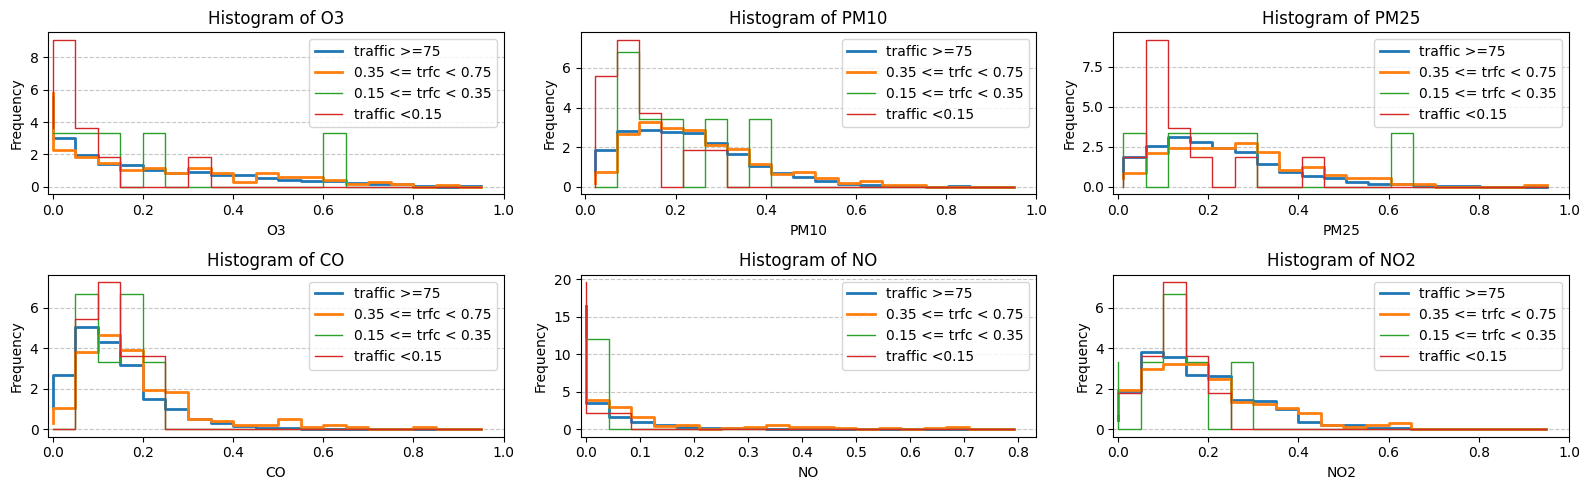

In [16]:
dir = r"C:\Users\Valeria\Documents\CIC\air_pollution_data\Datos-sep-dic2024"
#file_path = os.path.join(dir,"air_traffic_MER_prom.csv")
file_path = os.path.join(dir,"air_traffic_MER_norm.csv")
df  = pd.read_csv(file_path)
df = df.dropna().reset_index(drop=True)


df75 = df[df.traffic >= 0.75]
df35 = df[(df.traffic >= 0.35) & (df.traffic <0.75)]
df15 = df[(df.traffic >= 0.15) & (df.traffic <0.35)]
df0 = df[df.traffic < 0.15]

fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist(df75, df35, df15, df0, i, j, pollutants[k], axes)
		k = k+1
plt.show()

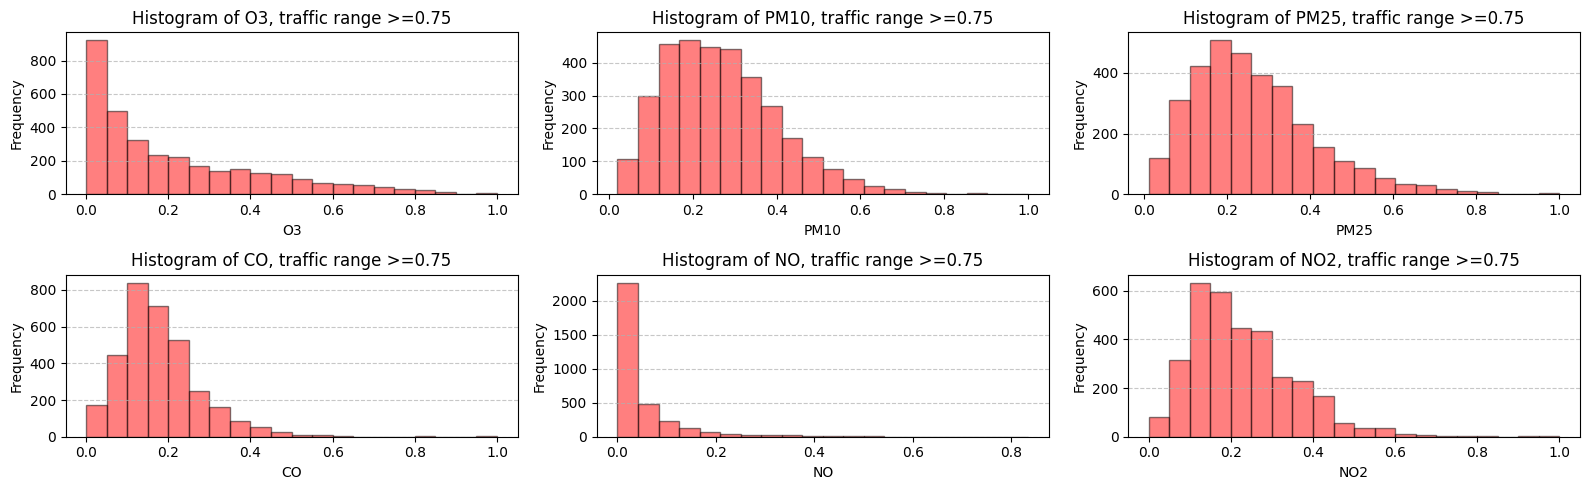

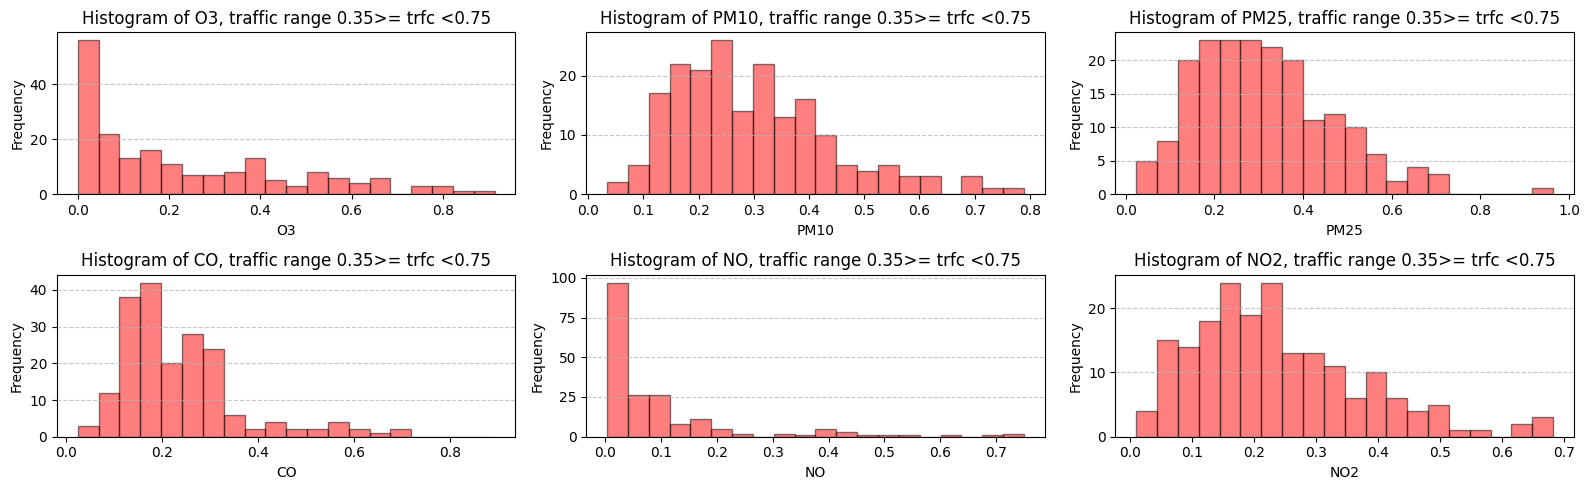

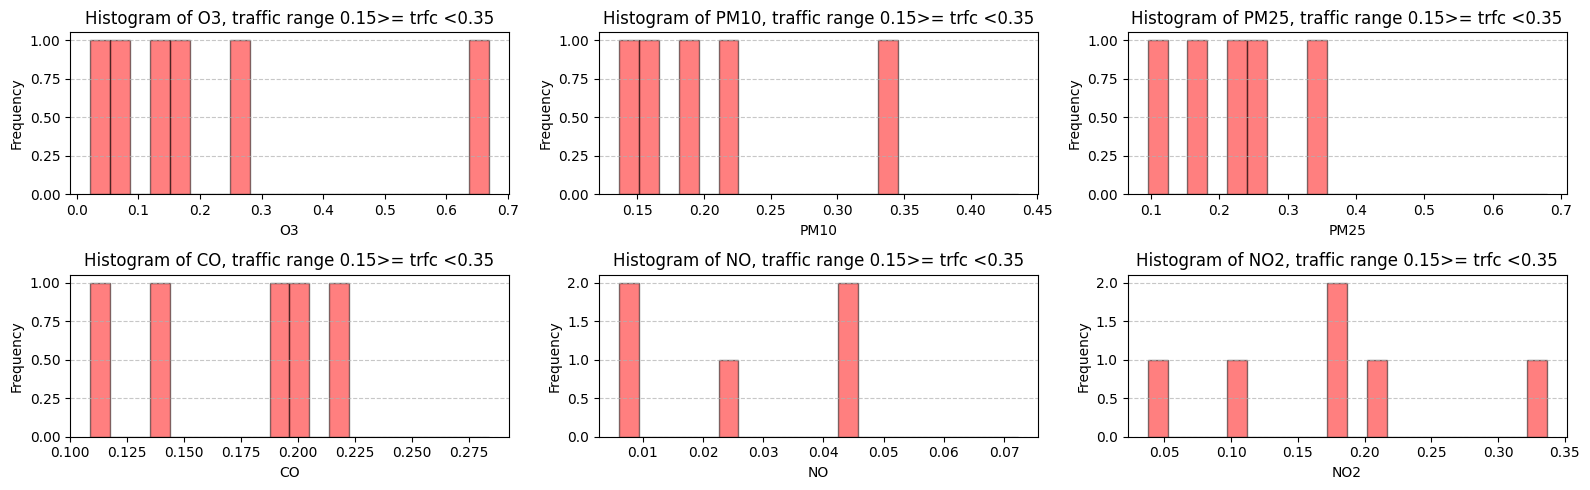

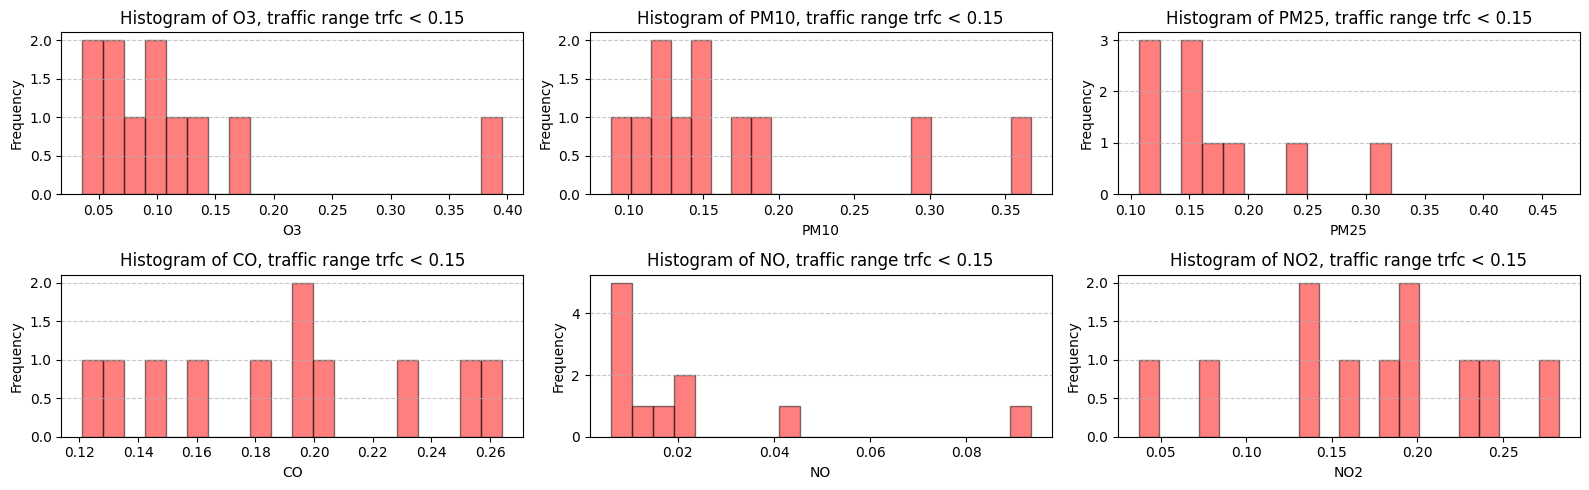

In [37]:
bin_width = (1 - 0) / 60  # Define width based on desired bins
bins = np.arange(0, 1 + bin_width, bin_width)  # Ensure consistent width
df75 = df[df.traffic >= 0.75]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, ">=0.75")
		k = k+1
plt.show()

df75 = df[(df.traffic >= 0.35) & (df.traffic <0.75)]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, "0.35>= trfc <0.75")
		k = k+1
plt.show()

df75 = df[(df.traffic >= 0.15) & (df.traffic <0.35)]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, "0.15>= trfc <0.35")
		k = k+1
plt.show()

df75 = df[df.traffic < 0.15]
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
pollutants = ["O3", "PM10", "PM25", "CO", "NO", "NO2"]
k = 0
for i in range(2):
	for j in range(3):
		plot_hist_prev(df75, i, j, pollutants[k], axes, "trfc < 0.15")
		k = k+1
plt.show()

In [ ]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\Proyecto_Innovacion\main\air-poll-predict-dev\API\InfoPostgres\Datos\air_traffic_MER_prom.csv"
df = pd.read_csv(dir)

In [ ]:
df.keys()

Index(['date', 'CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2',
       'TMP', 'WDR', 'WSP', 'year', 'month', 'day', 'hour', 'minute',
       'traffic'],
      dtype='object')

In [ ]:
target_idx = {'CO':0, 'NO':1, 'NOX':2, 'NO2':3, 'O3':4, 'PM10':5, 'PM25':6, 'RH':7, 'SO2':8, 'TMP':9, 'WDR':10, 'WSP':11}

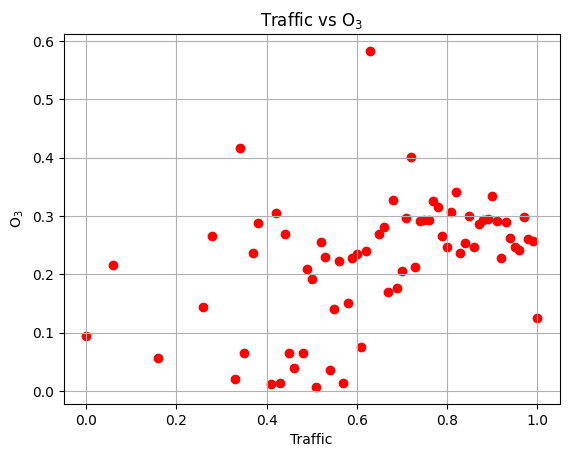

In [ ]:
df_trf = df.groupby('traffic').agg({'O3': 'mean', 'TMP': 'mean',  }).reset_index()
plt.scatter(df_trf.traffic,df_trf.O3, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Traffic')
plt.ylabel(r'O$_3$')
title1 = r'Traffic vs O$_3$'
plt.title(title1)
#plt.legend()
plt.grid(True)
plt.show()

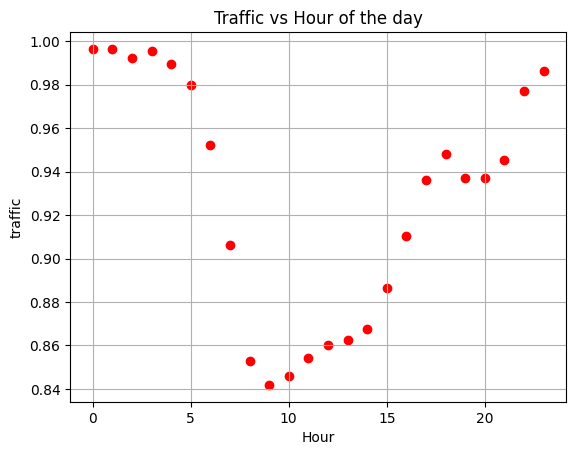

In [ ]:
df_trf = df.groupby('hour').agg({'traffic': 'mean', 'O3': 'mean',  }).reset_index()
plt.scatter(df_trf.hour,df_trf.traffic, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Hour')
plt.ylabel(r'traffic')
title1 = r'Traffic vs Hour of the day'
plt.title(title1)
#plt.legend()
plt.grid(True)
plt.show()

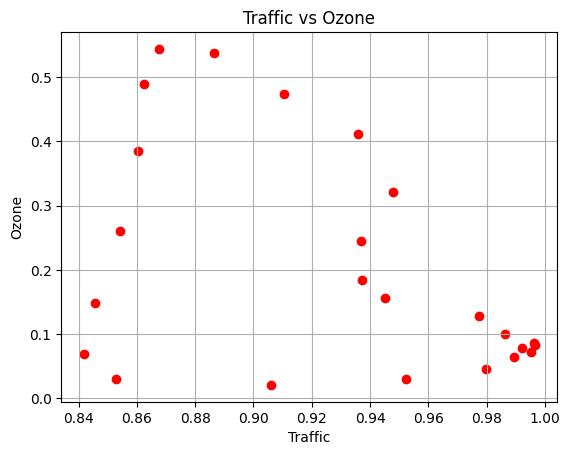

In [ ]:
df_trf = df.groupby('hour').agg({'traffic': 'mean', 'O3': 'mean' }).reset_index()
plt.scatter(df_trf.traffic,df_trf.O3, marker='o', label='O3', color='r')
#plt.plot(df_trf.TMP,df_trf.O3, marker='o', label='TMP', color='b')
plt.xlabel('Traffic')
plt.ylabel(r'Ozone')
title1 = r'Traffic vs Ozone'
plt.title(title1)
#plt.legend()
plt.grid(True)
plt.show()